In [11]:
import yfinance as yf
import pandas as pd
import numpy as np

In [12]:
Tickers = ["^SPX"]

start_input = "2010-01-01"
end_input = "2024-12-31"

S = yf.Ticker(Tickers[0]).history(start = start_input,end = end_input)
display(S.head())

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-01-04 00:00:00-05:00,1116.560059,1133.869995,1116.560059,1132.989990,3991400000,0.0,0.0
2010-01-05 00:00:00-05:00,1132.660034,1136.630005,1129.660034,1136.520020,2491020000,0.0,0.0
2010-01-06 00:00:00-05:00,1135.709961,1139.189941,1133.949951,1137.140015,4972660000,0.0,0.0
2010-01-07 00:00:00-05:00,1136.270020,1142.459961,1131.319946,1141.689941,5270680000,0.0,0.0
2010-01-08 00:00:00-05:00,1140.520020,1145.390015,1136.219971,1144.979980,4389590000,0.0,0.0


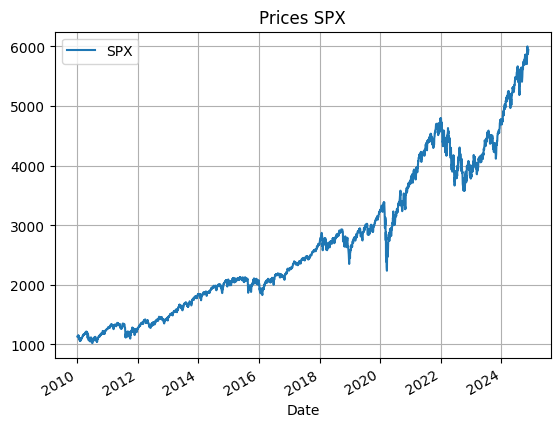

In [16]:
from matplotlib import pyplot as plt

S["Close"].plot(label="SPX")
plt.title("Prices SPX")
plt.grid()
plt.legend()
plt.show()

In [17]:
#extraction of additional finacial infos

SPY = yf.Ticker("^GSPC")

print("shortName :", SPY.info["shortName"])
print("currency :", SPY.info["currency"])
print("previousClose :", SPY.info["previousClose"])
print("open :", SPY.info["open"])
print("dayLow : ", SPY.info["dayLow"])
print("dayHigh :", SPY.info["dayHigh"])
print("fiftyTwoWeekHigh :", SPY.info["fiftyTwoWeekHigh"])
print("fiftyTwoWeekLow :", SPY.info["fiftyTwoWeekLow"])

shortName : S&P 500
currency : USD
previousClose : 5917.11
open : 5940.58
dayLow :  5887.26
dayHigh : 5947.1
fiftyTwoWeekHigh : 6017.31
fiftyTwoWeekLow : 4537.24


In [18]:
Amazon = yf.Ticker("AMZN")

print("marketCap :", Amazon.info["marketCap"])
print("priceToBook :", Amazon.info["priceToBook"])
print("debtToEquity :", Amazon.info["debtToEquity"])
print("previousClose :", Amazon.info["previousClose"])
print("revenuePerShare :", Amazon.info["revenuePerShare"])
print("profitMargins :", Amazon.info["profitMargins"])
print("targetHighPrice :", Amazon.info["targetHighPrice"])
print("targetLowPrice :", Amazon.info["targetLowPrice"])
print("numberOfAnalystOpinions :", Amazon.info["numberOfAnalystOpinions"])
print("sharesOutstanding :", Amazon.info["sharesOutstanding"])
print("sharesShort :", Amazon.info["sharesShort"])
print("shortPercentOfFloat :", Amazon.info["shortPercentOfFloat"])

marketCap : 2066197512192
priceToBook : 7.9699855
debtToEquity : 61.175
previousClose : 202.88
revenuePerShare : 59.486
profitMargins : 0.080419995
targetHighPrice : 285.0
targetLowPrice : 180.0
numberOfAnalystOpinions : 64
sharesOutstanding : 10515000320
sharesShort : 76617971
shortPercentOfFloat : 0.0082


In [19]:
AAPL = yf.Ticker("AAPL")
print(AAPL.info["marketCap"])
start_date = "2023-01-01"
end_date = "2024-12-31"
AAPL.dividends[start_date:end_date]

3456454098944


Date
2023-02-10 00:00:00-05:00    0.23
2023-05-12 00:00:00-04:00    0.24
2023-08-11 00:00:00-04:00    0.24
2023-11-10 00:00:00-05:00    0.24
2024-02-09 00:00:00-05:00    0.24
2024-05-10 00:00:00-04:00    0.25
2024-08-12 00:00:00-04:00    0.25
2024-11-08 00:00:00-05:00    0.25
Name: Dividends, dtype: float64

In [20]:
import datetime

Tickers = ["ALV.DE","BMW.DE"]
startinput = "2024-01-01"
endinput = "2024-10-01"

S = pd.DataFrame()

for t in Tickers:
  S[t] = yf.Ticker(t).history(start = startinput, end = endinput)["Close"]

print(S.head())
print(S.tail())

                               ALV.DE     BMW.DE
Date                                            
2024-01-02 00:00:00+01:00  232.545197  95.845306
2024-01-03 00:00:00+01:00  230.266739  93.707672
2024-01-04 00:00:00+01:00  233.067337  95.110786
2024-01-05 00:00:00+01:00  231.548370  94.790619
2024-01-08 00:00:00+01:00  232.165451  95.299126
                               ALV.DE     BMW.DE
Date                                            
2024-09-24 00:00:00+02:00  295.700012  78.120003
2024-09-25 00:00:00+02:00  294.100006  75.660004
2024-09-26 00:00:00+02:00  295.799988  78.540001
2024-09-27 00:00:00+02:00  296.500000  81.139999
2024-09-30 00:00:00+02:00  295.000000  79.180000


In [21]:
R = S/S.shift(1) - 1
R = R[1:]
Mean_d = R.mean()
Covar_d = R.cov()
Corr = R.corr()

In [22]:
Mean = Mean_d * 252
Covar = Covar_d * 252
STD = np.sqrt(np.diag(Covar))

In [23]:
print("\n Mean :\n")
print(Mean)

print("\n stadard deviaton :\n")
print(STD)

print("\n Variance Covariance : \n")
print(Covar)

print("\n Correlation : \n")
print(Corr)


 Mean :

ALV.DE    0.325187
BMW.DE   -0.215868
dtype: float64

 stadard deviaton :

[0.14930589 0.26676463]

 Variance Covariance : 

          ALV.DE    BMW.DE
ALV.DE  0.022292  0.012378
BMW.DE  0.012378  0.071163

 Correlation : 

          ALV.DE    BMW.DE
ALV.DE  1.000000  0.310781
BMW.DE  0.310781  1.000000


In [24]:
from numpy import linalg
from numpy.linalg import inv

In [25]:
r = 0.05
d = len(Tickers)
Vect = np.linspace(1,1,d)
Sigma = Covar
InvSigma = inv(Sigma)

a = Vect.T.dot(InvSigma).dot(Vect)
b = Mean.T.dot(InvSigma).dot(Vect)

pi_a = InvSigma.dot(Vect) / a
sd_a = 1 / np.sqrt(a)
m_a = b / a

print("check mean equality : ", m_a, pi_a.T.dot(Mean))
print("check var equality : ", sd_a**2, pi_a.T.dot(Sigma).dot(pi_a))
print("\n")



check mean equality :  0.24710709858148838 0.2471070985814883
check var equality :  0.02086155601274887 0.020861556012748864




In [26]:
m_w = np.sqrt((Mean - b/a * Vect).T.dot(InvSigma).dot(Mean - b/a * Vect))

pi_T = InvSigma.dot(Mean - r * Vect)/(b-r*a)
sd_T = np.sqrt(pi_T.dot(Sigma).dot(pi_T))
m_T = pi_T.T.dot(Mean)

In [27]:
print("expected return m_a :",m_a)
print("standard deviation s_a :",sd_a)
print("allocation pi_a :",pi_a)
print("sharpe ration :",(m_a -r) / sd_a)
print("\n")

print("expected return m_T :",m_T)
print("standard deviation s_T :",sd_T)
print("allocation pi_T :",pi_T)
print("sharpe ration :",(m_T -r) / sd_T)
print("\n")


expected return m_a : 0.24710709858148838
standard deviation s_a : 0.1444353004384623
allocation pi_a : [0.85568955 0.14431045]
sharpe ration : 1.3646739957830964


expected return m_T : 0.6981063766853698
standard deviation s_T : 0.26190594934502687
allocation pi_T : [ 1.68924511 -0.68924511]
sharpe ration : 2.474576764316164




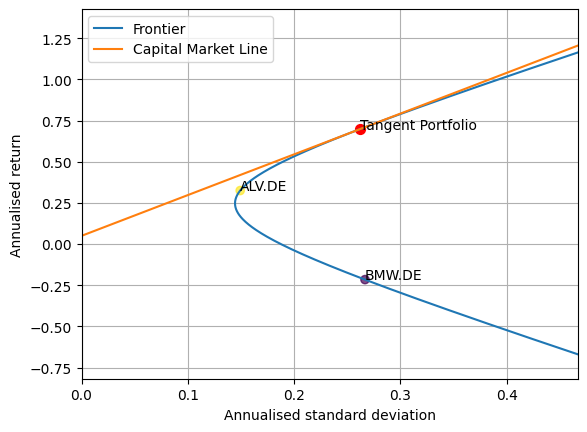

In [33]:
np.random.seed(7777)

colors = np.random.rand(len(STD))
range_inf = np.min(Mean) - 0.5
range_sup = np.max(Mean) + 1
y = np.linspace(range_inf,range_sup,500)
x_1 = np.array( [np.sqrt(((y - m_a)/m_w)**2 + sd_a**2)])
x_2 = np.array([(y - r)/(m_T - r) * sd_T])

fig,ax = plt.subplots()

plt.xlim(0,np.max(STD) + 0.2)

plt.plot(x_1[0],y,alpha=1)
plt.plot(x_2[0],y,alpha = 1)
plt.legend(["Frontier","Capital Market Line"], loc = 2)
plt.scatter(STD,Mean,c=colors,alpha=0.7)
plt.xlabel("Annualised standard deviation")
plt.ylabel("Annualised return")
plt.grid()
plt.scatter(sd_T,m_T,color="red",s=50,alpha=1)
ax.annotate("Tangent Portfolio",(sd_T,m_T))
for i,t in enumerate(Tickers):
  ax.annotate(t,(STD[i], Mean.iloc[i]))
plt.show()